In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

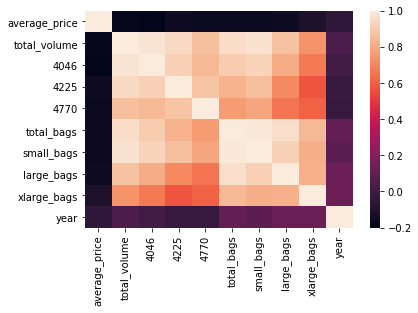

In [2]:
df = pd.read_csv('Tableau/avocado-updated-2020.csv')
corr = df.corr()


# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [3]:
df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


In [4]:
df = df[df['geography'] == 'Total U.S.']
df['month'] = df['date'].apply(lambda x: x.split('-')[1])
df['year'] = df['date'].apply(lambda x: x.split('-')[0])
grouped = df.groupby(['year', 'month']).mean()
grouped.head()

<ipython-input-4-614015c4e56c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].apply(lambda x: x.split('-')[1])
<ipython-input-4-614015c4e56c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].apply(lambda x: x.split('-')[0])


average_price  total_volume          4046          4225  \
year month                                                            
2015 01            1.2325  1.505669e+07  6.111703e+06  6.149645e+06   
     02            1.2275  1.718793e+07  7.311859e+06  6.808472e+06   
     03            1.2560  1.587573e+07  6.694906e+06  6.104917e+06   
     04            1.2975  1.631906e+07  7.219332e+06  5.908519e+06   
     05            1.2570  1.827522e+07  8.138431e+06  6.689806e+06   

                    4770    total_bags    small_bags    large_bags  \
year month                                                           
2015 01     415870.75750  2.379471e+06  1.954999e+06  418093.47250   
     02     490406.29000  2.577192e+06  2.156895e+06  409537.64625   
     03     468142.75500  2.607765e+06  2.238782e+06  354610.27900   
     04     451439.66625  2.739770e+06  2.329308e+06  399510.53375   
     05     479464.84300  2.967514e+06  2.504960e+06  451378.08400   

            xlarge_bags  
year month               
2015 01      6378.57750  
     02     10759.73875  
     03     14372.52300  
     04     10951.84625  
     05     11175.70600

In [5]:
data = pd.DataFrame({'average_price': grouped['average_price'],
                     'total_volume': grouped['total_volume']})

x, y = data['average_price'], data['total_volume']



In [6]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y)
xTrain, yTrain = np.array(xTrain).reshape(-1,1), np.array(yTrain).reshape(-1,1)
xTest, yTest = np.array(xTest).reshape(-1,1), np.array(yTest).reshape(-1,1)

In [7]:
res = LinearRegression().fit(xTrain, yTrain)

In [8]:
score = res.score(np.array(xTrain).reshape(-1,1), np.array(yTrain).reshape(-1,1))
print(f'RSQ = {score}')

RSQ = 0.13095502081206645


In [9]:
predictions = res.predict(xTest)
actual = []
predictionCol = []
for a in yTest:
    actual.append(a[0])
for p in predictions:
    predictionCol.append(p[0])
predictionDF = pd.DataFrame({'Predicted': predictionCol,
                              'Actual': actual})
predictionDF.head()

,Predicted,Actual
0,1.982923e+07,1.440388e+07
1,1.903474e+07,1.938765e+07
2,2.061221e+07,2.332106e+07
3,2.053161e+07,1.931835e+07
4,2.068359e+07,1.587573e+07


In [10]:
# Result analysis
predictionDF['Error'] = predictionDF['Actual'] - predictionDF['Predicted']
predictionDF['Error'] = predictionDF['Error'].apply(abs)
predictionDF['pctError'] = (predictionDF['Error'] / predictionDF['Actual']) * 100
predictionDF.head()

,Predicted,Actual,Error,pctError
0,1.982923e+07,1.440388e+07,5.425349e+06,37.665881
1,1.903474e+07,1.938765e+07,3.529054e+05,1.820259
2,2.061221e+07,2.332106e+07,2.708859e+06,11.615501
3,2.053161e+07,1.931835e+07,1.213252e+06,6.280307
4,2.068359e+07,1.587573e+07,4.807863e+06,30.284360


In [11]:
meanAbsErr = predictionDF['pctError'].mean()
print(f'Mean absolute Error = {round(meanAbsErr, 2)}%')

Mean absolute Error = 19.62%


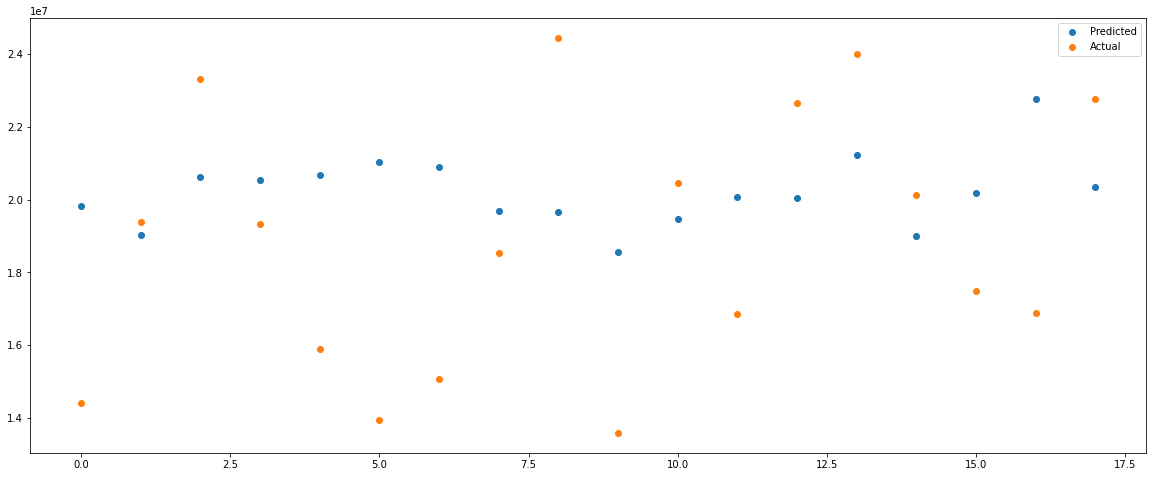

In [12]:
plt.figure(figsize=(20,8))
plt.scatter(predictionDF.index, predictionDF['Predicted'])
plt.scatter(predictionDF.index, predictionDF['Actual'])
plt.legend(['Predicted', 'Actual'])
plt.show()

Mostly overly-fitted linear measurements, However this model somewhat accurately follows dips in the avocado market (presumably droughts or other big market events)

In [13]:
df = pd.read_csv('Tableau/avocado-updated-2020.csv')
df['month'] = df['date'].apply(lambda x: x.split('-')[1])
df['year'] = df['date'].apply(lambda x: x.split('-')[0])
df['type'] = df['type'].apply(lambda x: 1 if x == 'organic' else 0)
df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,0,2015,Albany,01
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,1,2015,Albany,01
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,0,2015,Atlanta,01
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,1,2015,Atlanta,01
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,0,2015,Baltimore/Washington,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,1,2020,Total U.S.,11
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,0,2020,West,11
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,1,2020,West,11
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,0,2020,West Tex/New Mexico,11


In [14]:
df = pd.merge(df, pd.get_dummies(df['geography']), left_index=True, right_index=True)
df = pd.merge(df, pd.get_dummies(df['month']), left_index=True, right_index=True)
for col in ['4046', '4225', '4770', 'small_bags', 'large_bags']:
    del df[col]
df.columns

Index(['date', 'average_price', 'total_volume', 'total_bags', 'xlarge_bags',
       'type', 'year', 'geography', 'month', 'Albany', 'Atlanta',
       'Baltimore/Washington', 'Boise', 'Boston', 'Buffalo/Rochester',
       'California', 'Charlotte', 'Chicago', 'Cincinnati/Dayton', 'Columbus',
       'Dallas/Ft. Worth', 'Denver', 'Detroit', 'Grand Rapids', 'Great Lakes',
       'Harrisburg/Scranton', 'Hartford/Springfield', 'Houston',
       'Indianapolis', 'Jacksonville', 'Las Vegas', 'Los Angeles',
       'Louisville', 'Miami/Ft. Lauderdale', 'Midsouth', 'Nashville',
       'New Orleans/Mobile', 'New York', 'Northeast', 'Northern New England',
       'Orlando', 'Philadelphia', 'Phoenix/Tucson', 'Pittsburgh', 'Plains',
       'Portland', 'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke',
       'Sacramento', 'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/

In [15]:
y = df['average_price']
x = df[['total_volume','year', 'Albany', 'Atlanta', 'Baltimore/Washington', 'Boise',
       'Boston', 'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York', 'Northeast',
       'Northern New England', 'Orlando', 'Philadelphia', 'Phoenix/Tucson',
       'Pittsburgh', 'Plains', 'Portland', 'Raleigh/Greensboro',
       'Richmond/Norfolk', 'Roanoke', 'Sacramento', 'San Diego',
       'San Francisco', 'Seattle', 'South Carolina', 'South Central',
       'Southeast', 'Spokane', 'St. Louis', 'Syracuse', 'Tampa', 'Total U.S.',
       'West', 'West Tex/New Mexico', '01', '02', '03', '04', '05', '06', '07',
       '08', '09', '10', '11', '12' ]]
# Avoid perfect multicollinearity for all dummy variables
for col in [ 'Albany', '01']:
    del x[col]
x

,total_volume,year,Atlanta,Baltimore/Washington,Boise,Boston,Buffalo/Rochester,California,Charlotte,Chicago,...,03,04,05,06,07,08,09,10,11,12
0,40873.28,2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1373.95,2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,435021.49,2015,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3846.69,2015,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,788025.06,2015,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,1583056.27,2020,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33041,5811114.22,2020,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33042,289961.27,2020,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33043,822818.75,2020,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y)


In [17]:
xTrain

,total_volume,year,Atlanta,Baltimore/Washington,Boise,Boston,Buffalo/Rochester,California,Charlotte,Chicago,...,03,04,05,06,07,08,09,10,11,12
28897,574369.97,2020,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8173,298517.24,2016,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
19336,4035.51,2018,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17019,986474.74,2018,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30094,56748.00,2020,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10253,24753513.95,2016,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12417,813341.58,2017,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5119,3996.06,2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21550,23845.45,2018,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
res = LinearRegression().fit(xTrain, yTrain)
score = res.score(xTrain, yTrain)
print(f'RSQ = {score}')

RSQ = 0.24155885218128148


In [19]:
xTest['prediction'] = res.predict(xTest)
xTest

<ipython-input-19-c8bdccf9a939>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xTest['prediction'] = res.predict(xTest)


,total_volume,year,Atlanta,Baltimore/Washington,Boise,Boston,Buffalo/Rochester,California,Charlotte,Chicago,...,04,05,06,07,08,09,10,11,12,prediction
30145,1552615.00,2020,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1.448456
28638,33227.01,2020,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.072827
1405,1526.10,2015,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1.503435
22518,109285.38,2019,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.581784
9900,26444.58,2016,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.496458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32629,794185.57,2020,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1.466100
30072,323658.00,2020,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1.380630
3101,5879.03,2015,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1.339596
23405,508770.47,2019,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.504828


In [20]:
xTest['pctAbsDiff'] = (xTest['prediction'] - yTest) / yTest
xTest['pctAbsDiff'] = xTest['pctAbsDiff'].apply(lambda x: x * 100)


<ipython-input-20-0f368dbf8cd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xTest['pctAbsDiff'] = (xTest['prediction'] - yTest) / yTest
<ipython-input-20-0f368dbf8cd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xTest['pctAbsDiff'] = xTest['pctAbsDiff'].apply(lambda x: x * 100)


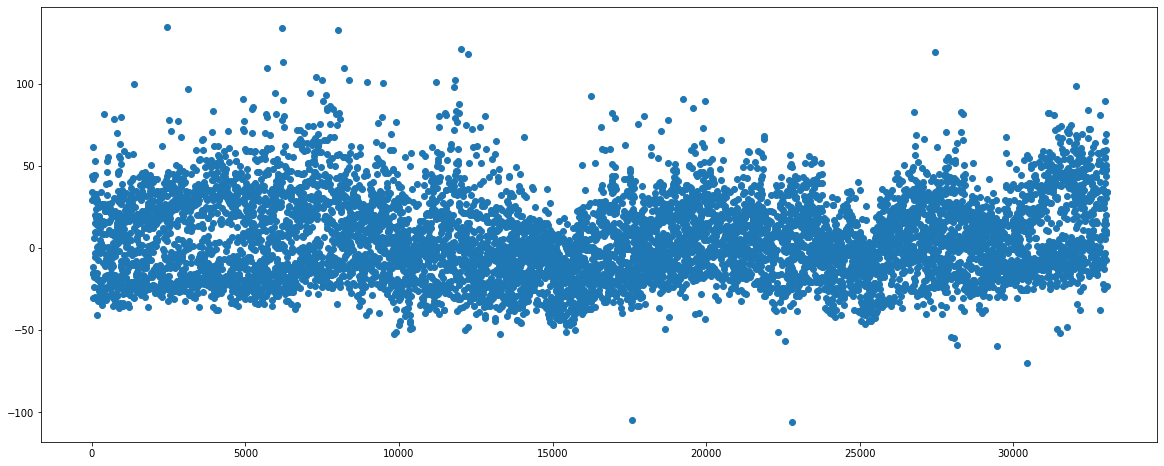

In [21]:
plt.figure(figsize=(20,8))
plt.scatter(xTest.index, xTest['pctAbsDiff'])

<AxesSubplot:>

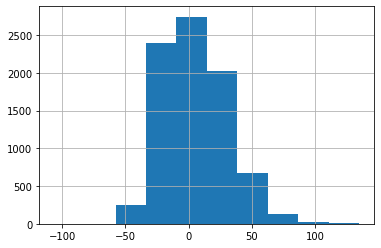

In [22]:
xTest['pctAbsDiff'].hist()

In [23]:
res.coef_

array([-2.88693377e-08, -8.20765908e-03, -1.97334524e-01,  4.09622596e-03,
       -6.08019201e-02,  6.26773511e-02, -1.01854671e-01,  5.19199437e-02,
        7.43291999e-02,  4.02395146e-02, -2.33669300e-01, -2.65976587e-01,
       -3.96621066e-01, -2.11271266e-01, -2.32617392e-01, -4.61011784e-02,
       -1.08918703e-01, -1.15401223e-01,  2.95980195e-01, -3.92159379e-01,
       -2.30857871e-01, -9.84004820e-02, -1.16920419e-01, -1.33262665e-01,
       -2.11241814e-01, -1.50276914e-01, -6.30653606e-02, -2.82317558e-01,
       -2.53625016e-01,  1.97697413e-01,  1.25921368e-01, -3.86908758e-02,
       -1.14742981e-01,  3.55229339e-02, -2.76010031e-01, -1.66600170e-01,
       -1.07726568e-01, -6.13536740e-02,  7.62315081e-02, -2.43307158e-01,
       -2.53908424e-01,  1.02269780e-01, -2.95908610e-02,  2.87129155e-01,
        6.12390127e-02, -1.10218044e-01, -2.78484934e-01, -9.85670084e-02,
        8.62090774e-03, -3.81332009e-02, -7.01782455e-02, -1.76128896e-01,
        4.05263866e-01, -

In [25]:
colDict = {}

# Add back in the columsn we deleted for multicollinearity reasons

for xCol, coef in zip(x.columns, res.coef_):
    colDict[xCol] = coef


In [26]:
colDict

{'total_volume': -2.8869337744275367e-08,
 'year': -0.008207659080921859,
 'Atlanta': -0.19733452389835454,
 'Baltimore/Washington': 0.004096225961057659,
 'Boise': -0.06080192009560939,
 'Boston': 0.06267735111255607,
 'Buffalo/Rochester': -0.10185467074472807,
 'California': 0.05191994371929165,
 'Charlotte': 0.07432919989980363,
 'Chicago': 0.040239514607513016,
 'Cincinnati/Dayton': -0.2336693004596688,
 'Columbus': -0.2659765873785379,
 'Dallas/Ft. Worth': -0.3966210655515754,
 'Denver': -0.21127126635236587,
 'Detroit': -0.23261739152299477,
 'Grand Rapids': -0.046101178416642075,
 'Great Lakes': -0.10891870318417055,
 'Harrisburg/Scranton': -0.11540122321033525,
 'Hartford/Springfield': 0.29598019451382906,
 'Houston': -0.3921593787097061,
 'Indianapolis': -0.23085787063884952,
 'Jacksonville': -0.09840048202420282,
 'Las Vegas': -0.11692041917975066,
 'Los Angeles': -0.13326266484551721,
 'Louisville': -0.2112418142940437,
 'Miami/Ft. Lauderdale': -0.15027691417036068,
 'Midsou

In [27]:
with open(coefficients.json, 'w') as file:
    json.dump(colDict, file)

NameError: name 'coefficients' is not defined